In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from matplotlib.collections import LineCollection
import matplotlib as mpl

import numpy as np
import pandas as pd

In [2]:
YEAR = 2024
RACE = 'Brazil'
SESSION = 'R'

session_race = ff1.get_session(YEAR, RACE, SESSION)
weekend = session_race.event
session_race.load()

req         WARNING 	DEFAULT CACHE ENABLED! (734.18 MB) C:\Users\kumar\AppData\Local\Temp\fastf1
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control

In [3]:
VER_lap = session_race.laps.pick_driver('VER').pick_quicklaps().reset_index()
VER_lap['LapTime'] = VER_lap['LapTime'].dt.total_seconds().astype(float)

C:\Users\kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


C:\Users\kumar\AppData\Local\Temp\ipykernel_20316\3648151196.py:5: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.scatterplot(data=VER_lap,


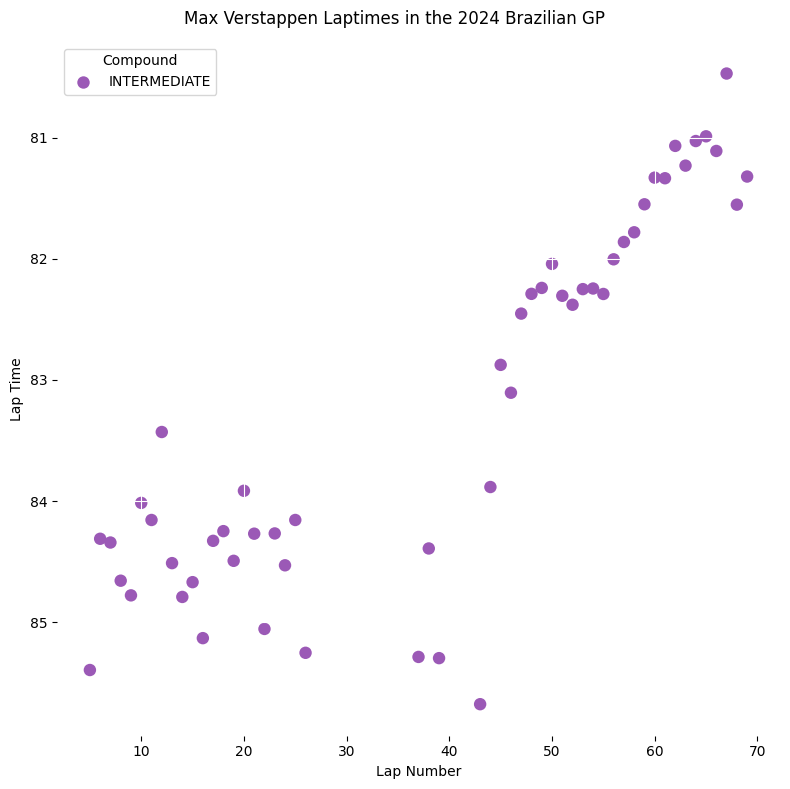

In [4]:
fig, ax = plt.subplots(figsize=(8,8))

import seaborn as sns

sns.scatterplot(data=VER_lap,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                # Marker colors corresponding to the compounds used in the race
                palette=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"],
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Max Verstappen Laptimes in the 2024 Brazilian GP")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()